# Конспект по книге "Python для сложных задач" Дж. Вандер Плас

## Глава 2. Введение в библиотеку NumPy

### Зачем нужен NumPy?

Почему считается, что код на Python выполняется очень медленно? Потому что для стандартных его функций так и есть. Всё из-за динамической типизации: при каждом присваивании и операции Python проверяет типы и пытается их переписать при несоответствии. Например, реализация обычного целого числа, используемого в Python, на языке Си выглядит так: 
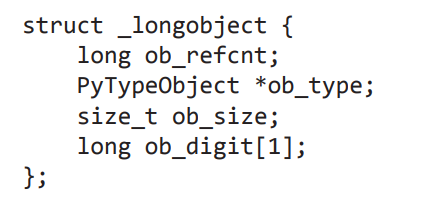

Отдельное целое число в языке Python 3.4 фактически состоит из четырех частей:

 ob_refcnt — счетчика ссылок, с помощью которого Python незаметно выполняет
выделение и освобождение памяти;

 ob_type — кодирующей тип переменной;

 ob_size — задающей размер следующих элементов данных;

 ob_digit — содержащей фактическое целочисленное значение, которое представляет переменная языка Python.

При каждом обращении к переменной, интерпретатор проверяет поле ob_type, пробует изменить его при несоответствии. Выглядит некритично, но в цикле на 10.000 итераций с 10ю операциями получается очень большая задержка(именно поэтому циклы в Питоне работают так медленно).

Аналогичная история с избыточностью и со списками.

В Питоне уже есть встроенный тип массива с жесткой типизацией - array и ndarray, но они не предоставляют большого необходимого количества оперцаий над ними. Для этого и нужен NumPy.

In [1]:
import numpy as np

### Массивы в библиотеке NumPy

#### Объявление массивов

Массивы в NumPy поддерживают хранение строго заданного количества элементов одного типа (как и стандартные массивы других ЯП). Тип элементов массива можно не указаывать, а можно и указать явно. Далее несколко примеров создания массивов в NumPy:

In [2]:
x = [1, 2, 3, 4]
y = np.array(x)
y

array([1, 2, 3, 4])

In [3]:
y = np.array([[1, 2, 3, 4],[4, 3, 2, 1]], dtype = 'float32')
y

array([[1., 2., 3., 4.],
       [4., 3., 2., 1.]], dtype=float32)

In [4]:
np.zeros((2, 3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [5]:
np.ones(8, dtype = 'int32')

array([1, 1, 1, 1, 1, 1, 1, 1])

In [6]:
np.eye(3, 3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [7]:
np.arange(1, 10, 3)

array([1, 4, 7])

In [8]:
np.linspace(0, 4, 9)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ])

In [9]:
np.array([range(i, i + 5) for i in [2, 4, 6]])

array([[ 2,  3,  4,  5,  6],
       [ 4,  5,  6,  7,  8],
       [ 6,  7,  8,  9, 10]])

In [10]:
np.full((2, 4), 8.15)

array([[8.15, 8.15, 8.15, 8.15],
       [8.15, 8.15, 8.15, 8.15]])

In [11]:
np.random.random((1, 5))

array([[0.48879622, 0.77705065, 0.48544871, 0.47675436, 0.54042086]])

In [12]:
np.random.randint(1, 10, (2, 2))

array([[9, 7],
       [6, 3]])

In [13]:
np.random.normal(0, 1, (3, 3))

array([[ 1.65932645,  0.069639  , -0.18899596],
       [ 1.74526449, -0.37385168,  0.8655497 ],
       [ 0.58514664,  0.53209712, -0.35588574]])

У каждого массива NumPy есть обязательные атрибуты: ndim (размерность), shape (размер каждого измерения) и size (общий размер массива), dtype (тип данных массива),  itemsize (размер (в байтах) каждого элемента массива), nbytes (полный размер массива (в байтах)).

In [14]:
x = np.random.randint(1, 10, (3, 5))
print(x)
print("x ndim: ", x.ndim)
print("x shape:", x.shape)
print("x size: ", x.size)
print("x dtype", x.dtype)
print("itemsize:", x.itemsize, "bytes")
print("nbytes (= itemsize * size):", x.nbytes, "bytes")

[[4 2 1 6 3]
 [9 9 1 9 7]
 [3 1 8 1 2]]
x ndim:  2
x shape: (3, 5)
x size:  15
x dtype int32
itemsize: 4 bytes
nbytes (= itemsize * size): 60 bytes


#### Подмассивы 

Доступ к элеметам массива можно осуществлять напрямую при помощи [], обычной и обратной многомерной индексации, а также при помощи срезов:

In [15]:
x = np.arange(0, 10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
x[[3, -1]]

array([3, 9])

In [17]:
x = np.random.randint(1, 10, (4, 4))
x

array([[4, 3, 5, 3],
       [7, 6, 8, 4],
       [9, 3, 3, 6],
       [2, 3, 2, 4]])

In [18]:
x[0]

array([4, 3, 5, 3])

In [19]:
x[:,1]

array([3, 6, 3, 3])

In [20]:
x[1:3,:2]

array([[7, 6],
       [9, 3]])

In [21]:
x = np.random.randint(1, 10, (4, 4, 4))
x

array([[[5, 1, 5, 6],
        [8, 9, 8, 6],
        [4, 3, 4, 9],
        [1, 7, 5, 2]],

       [[3, 9, 1, 1],
        [8, 4, 4, 8],
        [1, 1, 8, 1],
        [6, 5, 2, 8]],

       [[2, 2, 3, 2],
        [4, 7, 4, 6],
        [1, 9, 9, 9],
        [1, 1, 5, 5]],

       [[2, 5, 2, 1],
        [7, 2, 3, 7],
        [4, 8, 8, 7],
        [7, 1, 5, 3]]])

In [22]:
x[:,:, 0]

array([[5, 8, 4, 1],
       [3, 8, 1, 6],
       [2, 4, 1, 1],
       [2, 7, 4, 7]])

In [23]:
x[:,:,:1:2]

array([[[5],
        [8],
        [4],
        [1]],

       [[3],
        [8],
        [1],
        [6]],

       [[2],
        [4],
        [1],
        [1]],

       [[2],
        [7],
        [4],
        [7]]])

В отличие от списков языка Python, у массивов NumPy фиксированный тип данных. При попытке вставить в массив целых чисел значение с плавающей точкой это значение будет незаметно усечено.

In [24]:
x1 = np.arange(1,10)
x1[0] = 3.14159 # это значение будет усечено!
x1

array([3, 2, 3, 4, 5, 6, 7, 8, 9])

При отрицательном шаге в срезе границы массива меняются местами:

In [25]:
x1 = np.arange(1,10)
x1[5::-2]

array([6, 4, 2])

Срезы массивов возвращают представления (views), а не копии (copies) данных
массива. Этим срезы массивов библиотеки NumPy отличаются от срезов списков
языка Python (в списках срезы являются копиями):

In [26]:
x2 = x1[:3]
x2 = 28
x1

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

Копию подмассива или самого массива можно сделать при помощи метода:

In [27]:
x3 = x1[5:8].copy()
x3 = 49

x1

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

#### Изменение формы, слияние и разбиение массивов

Форму массива можно изменить при помощи функции reshape. Для этого необходимо, чтобы кол-во элементов в исходном массиве совпадало с кол-вом элементов в изменённой форме.

In [28]:
x = np.arange(12)

x.reshape((3,4))

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [29]:
x.reshape((2,3,2))

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]]])

Для преобразования в вектор-строку или в вектор-столбец, можно использовать np.newaxis

In [30]:
x = np.arange(4)

x[:, np.newaxis]

array([[0],
       [1],
       [2],
       [3]])

In [31]:
x[np.newaxis, :]

array([[0, 1, 2, 3]])

Слияние, или объединение, двух массивов в библиотеке NumPy выполняется в основном с помощью методов np.concatenate, np.vstack и np.hstack. Метод np.concatenate принимает на входе кортеж или список массивов в качестве первого аргумента:

In [32]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

In [33]:
z = [99, 99, 99]
np.concatenate([x, y, z])

array([ 1,  2,  3,  3,  2,  1, 99, 99, 99])

In [34]:
grid = np.array([[1, 2, 3], [4, 5, 6]])
grid

array([[1, 2, 3],
       [4, 5, 6]])

In [35]:
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [36]:
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

Для работы с массивами с различающимися измерениями удобнее и понятнее использовать функции np.vstack (вертикальное объединение) и np.hstack (горизонтальное объединение):

In [37]:
x = np.random.randint(0, 10, 3)
np.vstack([x, grid])

array([[3, 3, 9],
       [1, 2, 3],
       [4, 5, 6]])

In [38]:
y = np.array([9, 8]).reshape(2, 1)
np.hstack([y, grid])

array([[9, 1, 2, 3],
       [8, 4, 5, 6]])

Разбиение выполняется с помощью функций np.split, np.hsplit и np.vsplit. Каждой из них необходимо передавать список индексов, задающих точки раздела. Если индес точки раздела лежит вне массива, возвращается пустой массив размерности 0:

In [39]:
x = np.arange(0, 10)
x1, x2, x3 = np.split(x, [2,6])
x1, x2, x3

(array([0, 1]), array([2, 3, 4, 5]), array([6, 7, 8, 9]))

In [40]:
y = x.reshape((2, 5))
y

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [41]:
y1, y2, y3, y4 = np.hsplit(y, [1, 2, 5])
y1, y2, y3, y4

(array([[0],
        [5]]),
 array([[1],
        [6]]),
 array([[2, 3, 4],
        [7, 8, 9]]),
 array([], shape=(2, 0), dtype=int32))

In [42]:
y1, y2 = np.vsplit(y, [1])
y1, y2

(array([[0, 1, 2, 3, 4]]), array([[5, 6, 7, 8, 9]]))

### Универсальные функции

Как мы помниим, циклы в Python рабтают очень медленно, следовательно, действие, применяемое ко всем элементам массива, обходится очень дорого по времени. Эту проблему решают универсальные функции библиотеки numpy. Они применяют уже скомпилированную операцию к строго типизированному массиву, что ускоряет процесс на несколько порядков:

In [43]:
def test_of_multiply(x, n):
    for i in range(len(x)):
        x[i] *= n
    return x

x = np.random.random(1000000)
%timeit test_of_multiply(x, 579)

642 ms ± 87.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [44]:
%timeit x * 579

3.57 ms ± 155 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Универсальные функции есть относительно большинства привычных арифметических операций и их комбинаций, также они применяются и к многомерным массивам:

In [45]:
x = np.arange(0, 12).reshape(3, 4)
2 ** x

array([[   1,    2,    4,    8],
       [  16,   32,   64,  128],
       [ 256,  512, 1024, 2048]], dtype=int32)

In [46]:
((-(x - 1)*2)//5)%3

array([[0, 0, 2, 2],
       [1, 1, 1, 0],
       [0, 2, 2, 2]], dtype=int32)

Также все эти операции можно производить над двумя массивами одинакового размера. Операция в таком случае выполняется почленно:

In [47]:
x = np.arange(-1, -10, -1).reshape(3,3)
y = np.arange(1, 10).reshape(3,3)

x * y

array([[ -1,  -4,  -9],
       [-16, -25, -36],
       [-49, -64, -81]])

Все подобным образом записанные арифметические операции являются сокращённой записаью универсальных функций: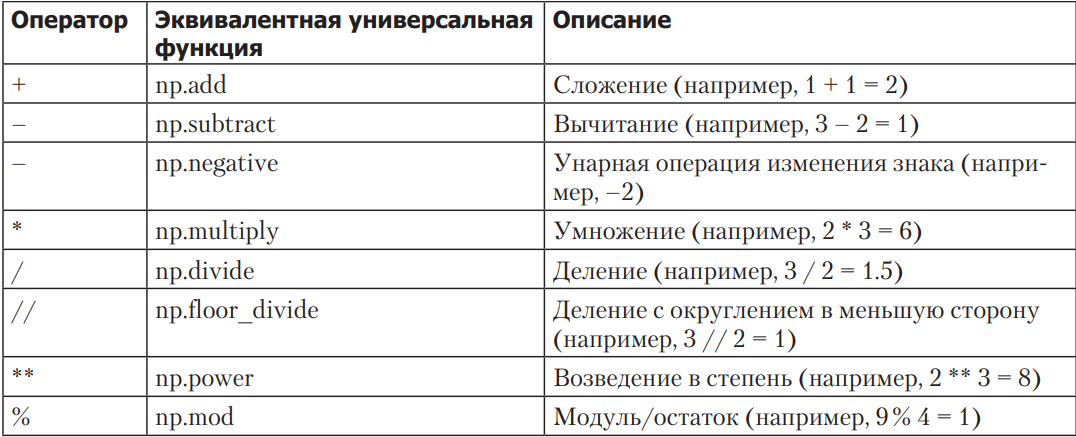

Следующие функции также являются универсальными и выполняются быстрее подобных функций из обычной библиотеки:

In [48]:
x = np.linspace(-np.pi, np.pi, 3)
x

array([-3.14159265,  0.        ,  3.14159265])

In [49]:
print(abs(x))
print(np.sin(x))
print(np.cos(x))
print(np.tan(x))
print(np.arcsin(np.sin(x)))
print(np.arctan(np.tan(x)))
print(np.exp(x))
print(np.log(x + 4))

[3.14159265 0.         3.14159265]
[-1.2246468e-16  0.0000000e+00  1.2246468e-16]
[-1.  1. -1.]
[ 1.2246468e-16  0.0000000e+00 -1.2246468e-16]
[-1.2246468e-16  0.0000000e+00  1.2246468e-16]
[ 1.2246468e-16  0.0000000e+00 -1.2246468e-16]
[ 0.04321392  1.         23.14069263]
[-0.15267653  1.38629436  1.96593581]


Также есть огромное множество сложных функций по типу гамма-функций и функции ошибок Гаусса.

Для универсальных функций можно указывать выходной массив, в который будет положен результат функции. Это помогает лишнего копирования.

In [50]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
y

array([ 0., 10., 20., 30., 40.])

In [51]:
y = np.zeros(10)
np.power(2, x, out=y[::2])
y

array([ 1.,  0.,  2.,  0.,  4.,  0.,  8.,  0., 16.,  0.])

У бинарных универсальных функций есть возможность вычислять непосредственно на основе объекта некоторые сводные данные. Например, если нам нужно редуцировать массив с помощью данной конкретной операции, можно воспользоваться методом reduce соответствующей универсальной функции. Операция reduce многократно применяет заданную операцию к элементам массива до тех пор, пока не останется только один результат.

Например, вызов метода reduce для универсальной функции add возвращает сумму всех элементов массива:

In [52]:
x = np.arange(1, 4)
np.add.reduce(x)

6

Если же мы хотим сохранить все промежуточные результаты вычислений, можно вместо reduce воспользоваться функцией accumulate:

In [53]:
np.add.accumulate(x)

array([1, 3, 6], dtype=int32)

Данные функции аналогичны функциям:

In [54]:
np.sum(x)

6

In [55]:
np.cumsum(x)

array([1, 3, 6], dtype=int32)

Все универсальные функции могут выводить результат применения соответствующей операции ко всем парам двух аргументов с помощью метода outer. Это дает возможность одной строкой кода создавать, например, таблицу умножения:

In [56]:
x = np.arange(1, 6)
np.multiply.outer(x, x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

### Агрегирующие функции

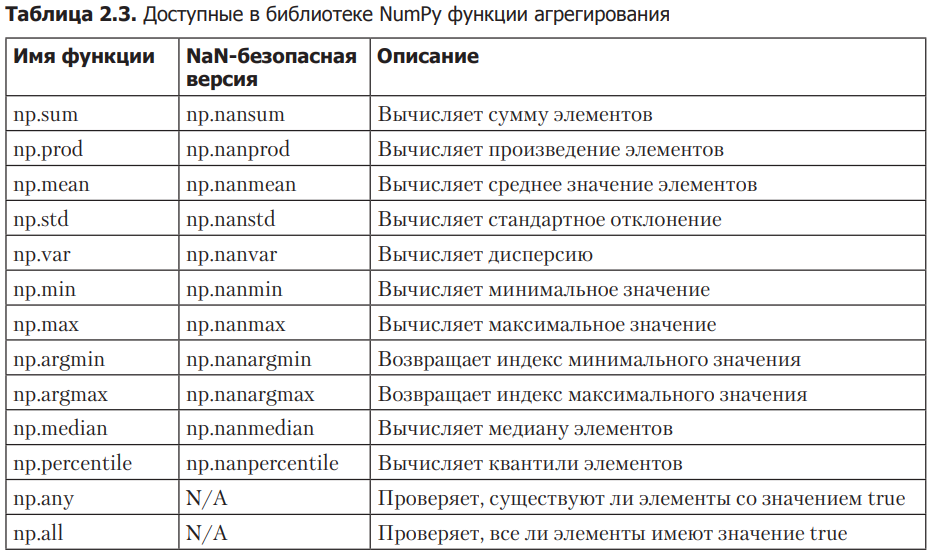

Агрегирующие функции в NumPy действуют быстрее аналагов стандартных библиотек, т.к. работают со строго тиипизированными данными.
Также агрегирующие функции в NumPy работают и с многомерными массивами с возможностью указания оси, относительно которой будут вычисляться показатели.

In [57]:
x = np.random.randint(1, 512, 1000000)

%timeit max(x)
%timeit np.max(x)

84.2 ms ± 11.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
961 µs ± 14.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [58]:
x = x.reshape(8, 125000)
np.argmin(x)

243

In [59]:
np.sum(x, axis=0)

array([2044, 1910, 1989, ..., 1383, 1368, 1371])

In [60]:
np.std(x, axis=1)

array([147.441225  , 147.66851285, 147.56064436, 147.34809549,
       147.54772608, 147.66448915, 147.19818607, 147.44149364])

### Транслирование

Транслирование представляет собой набор правил по применению бинарных универсальных функций (сложение, вычитание, умножение и т. д.) к массивам различного размера.

Транслирование дает возможность выполнять подобные бинарные операции над массивами различных размеров, например, можно легко прибавить скалярное значение (рассматривая его как нульмерный массив) к массиву:

In [61]:
a = np.array([0, 1, 2])

a + 5

array([5, 6, 7])

Можно рассматривать транслирование как операцию, превращающую путем растягивания (или дублирования) значение 5 в массив [5,5,5], после чего складывающую полученный результат с массивом a. Преимущество NumPy-транслирования заключается в том, что дублирование значений на самом деле не выполняется, это лишь удобная нам умозрительная модель.

Аналогично можно распространить транслирование на массивы большей размерности. Например, сложение одномерного и двумерного массивов:

In [62]:
b = np.ones((3,3))

a + b

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

Более сложные случаи могут включать транслирование обоих массивов:

In [63]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]
a, b

(array([0, 1, 2]),
 array([[0],
        [1],
        [2]]))

In [64]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

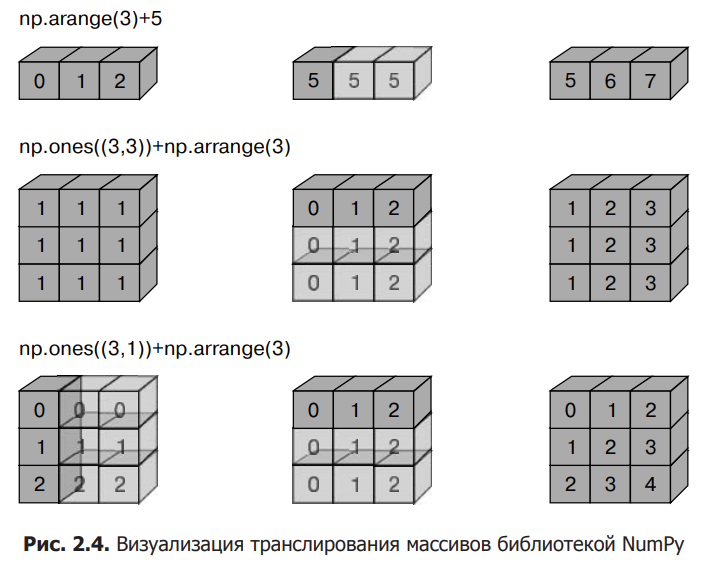

#### Правила транислирования

Транслирование в библиотеке NumPy следует строгому набору правил, определяющему взаимодействие двух массивов.

 Правило 1: если размерность двух массивов отличается, форма массива с меньшей размерностью дополняется единицами с ведущей (левой) стороны.

 Правило 2: если форма двух массивов не совпадает в каком-то измерении, массив с формой, равной 1 в данном измерении, растягивается вплоть до соответствия форме другого массива.

 Правило 3: если в каком-либо измерении размеры массивов различаются и ни один не равен 1, генерируется ошибка.

За подробными примерами транслирвания лучше обратиться к книге, стр.94

#### Применение транслирования для центрирования массива:

In [65]:
x = np.random.randint?

In [ ]:
x = np.random.randint

In [66]:
x = np.random.randint(1, 100, (3, 5))
x

array([[48, 31, 32, 38, 82],
       [12, 64, 34,  4, 35],
       [72, 92, 32, 79, 99]])

In [67]:
m = np.mean(x, axis=0)
m

array([44.        , 62.33333333, 32.66666667, 40.33333333, 72.        ])

In [68]:
centr_arr = x - m
np.mean(centr_arr, axis=0)

array([ 0.00000000e+00, -2.36847579e-15,  2.36847579e-15, -2.36847579e-15,
        0.00000000e+00])

Получили центрированный по строкам массив со средним значением в строках = 0 (с компьтерной точностью)

### Операторы сравнения, булевы маски

Все операторы сравнения являются универсальными функциями для массивов NumPy, применяемыми также и к двум массивам одного размера или по правилам транслирования. Они возвращают булеву маску массива по условию сравнения:
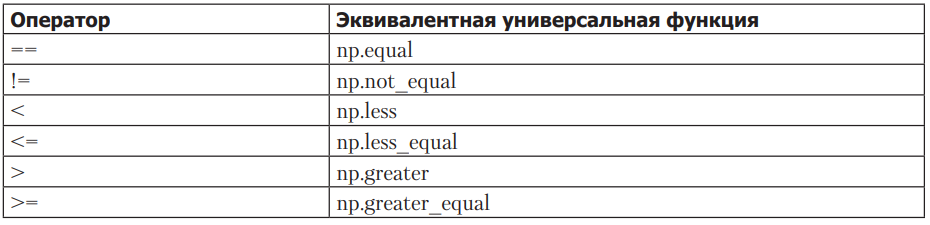

In [69]:
x = np.arange(-3, 7).reshape(2, 5)
x

array([[-3, -2, -1,  0,  1],
       [ 2,  3,  4,  5,  6]])

In [70]:
x > 1

array([[False, False, False, False, False],
       [ True,  True,  True,  True,  True]])

In [71]:
y = np.arange(0, 10).reshape(2, 5)

(2 ** y) > (x ** 2)

array([[False, False,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

Для подсчёта истинных элементов маски можно использовать 2 функции:

In [72]:
np.count_nonzero(x > 3)

3

In [73]:
np.sum(x > 3)

3

Преимущество sum в том, что можно выводить информацию по разным измерениям:

In [74]:
np.sum(x > 0, axis=1)

array([1, 5])

Для определения, есть ли элементы удовлетворяющие условию в массиве или все ли элементы удовлетворяют условию, используются np.any и np.all:

In [75]:
np.any(x < -2)

True

In [76]:
np.all(x > 0)

False

In [77]:
np.all(x >= -1, axis=0)

array([False, False,  True,  True,  True])

Можно также использовать несколько операций сравнения, связанных логической связкой:

In [78]:
(x > 0) & (x < 5)

array([[False, False, False, False,  True],
       [ True,  True,  True, False, False]])

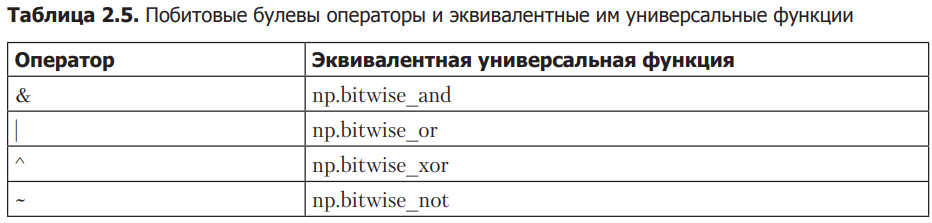

Получающие булевы массивы можно сразу же использовать как маски, возвращающие массив только с теми значениями, в которых указано True в массиве маски.

In [79]:
x[x > 0]

array([1, 2, 3, 4, 5, 6])

In [80]:
x[(x < 4) & ((x % 2) > 0)]

array([-3, -1,  1,  3])

#### Разница между and/or и &/|

Различие заключается в следующем: ключевые слова AND и OR определяют истинность или ложность всего объекта, операторы & и | оперируют отдельными битами внутри каждого из объектов.

Использование ключевых слов and и or приводит к тому, что язык Python будет рассматривать объект как одну булеву сущность. В Python все ненулевые целые числа будут рассматриваться как True.

In [81]:
bool(34), bool(0)

(True, False)

In [82]:
bool(34) and bool(0)

False

In [83]:
bin(34), bin(14)

('0b100010', '0b1110')

In [84]:
bin(34 & 14)

'0b10'

### Прихотливая индексация

Прихотливая индексация - это способ задания подмножества массива с помощью передачи списка индексов элементов, которые мы хотим выбрать. Работает как для одномерных, так и для многомерных массивов и подчиняется всем правилам транслирования.

In [85]:
x = np.random.randint(1, 10, 12)
x

array([2, 4, 1, 1, 7, 2, 4, 9, 9, 5, 2, 3])

In [86]:
x[[1, 4, 7, 1]]

array([4, 7, 9, 4])

In [87]:
y = np.reshape(x, (3, 4))
y

array([[2, 4, 1, 1],
       [7, 2, 4, 9],
       [9, 5, 2, 3]])

In [88]:
row = np.array([1, 2, 0])
col = np.array([1, 3, 0])


y[row, col]

array([2, 3, 2])

При разных размерностях массивов индексов, они будут приведены к общему виду при помощи правил транслирования. Результат будет иметь такую же размерность как и новый массив индексов.

In [89]:
y[row[:, np.newaxis], col]

array([[2, 9, 7],
       [5, 3, 9],
       [4, 1, 2]])

Прихотливую индексацию можно также использовать вместе с любыми другими методами индексации:

In [90]:
y[2, col]

array([5, 3, 9])

In [91]:
mask = [1, 0, 0]

y[mask, col[:, np.newaxis]]

array([[2, 4, 4],
       [9, 1, 1],
       [7, 2, 2]])

#### Изменение значений с помощью прихотливой индексации

Как можно было заметить, в массивах индексов при призотливой индексации можно было указывать повторяющиеся значения. Это означает возможные проблемы при попытке изменить значения к которым обращаются по прихотливой индексации. На самом деле все операции выполняются по порядку индексов в массиве индексов, однако все же поведение не очевидно с первого взгляда:

In [92]:
x = np.arange(0, 10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [93]:
index = [2, 3, 2]
x[index]

array([2, 3, 2])

В данном примере на самом деле записано выражение x[index] = x[index] - 1, что ознчает, что сначала вычисляется значение x[index] - 1, а затем выполняется присвание для всех индексов из массива индексов, что означает, что повторяется только присваивание, а не вычитание:

In [94]:
x[index] -= 1
x

array([0, 1, 1, 2, 4, 5, 6, 7, 8, 9])

А в этом примере просто повторяется присваивание элементу 2 подряд двух значений. Остаётся послденее:

In [95]:
x = np.arange(0, 10)
x[index] = [10, 11, 12]
x

array([ 0,  1, 12, 11,  4,  5,  6,  7,  8,  9])

### Сортировка массивов

По умолчанию доступны следующие функции сортировки:

In [96]:
np.*sort*?

np.sort - быстрая сортировка, np.argsort - возвращает массив индексов исходного массива в том порядке, в котором они стоят в отсортированном массиве, этот массив можно в последствии использовать при помощи прихотливой индексации, но не изменяя положения элементов в массиве.

Разница между np.sort(x) и x.sort():

np.sort() - возвращает отсортированную копию массива, не меняя его

x.sort() - сортирует сам массив.

In [97]:
x = np.array([2, 1, 4, 3, 5])
print(np.sort(x))
x

[1 2 3 4 5]


array([2, 1, 4, 3, 5])

In [98]:
x.sort()
x

array([1, 2, 3, 4, 5])

In [99]:
x = np.array([2, 1, 4, 3, 5])
index = np.argsort(x)
x

array([2, 1, 4, 3, 5])

Также можно сортировать массивы по столбцам и строкам и отделять первые n наименьших значений (меньшая и большая части будут иметь элементы в случайном порядке):

In [100]:
x = np.random.randint(0, 10, (4, 6))
x

array([[2, 2, 5, 6, 5, 0],
       [5, 4, 7, 8, 1, 6],
       [1, 0, 1, 1, 5, 5],
       [2, 4, 7, 8, 1, 9]])

In [101]:
np.sort(x, axis = 1)

array([[0, 2, 2, 5, 5, 6],
       [1, 4, 5, 6, 7, 8],
       [0, 1, 1, 1, 5, 5],
       [1, 2, 4, 7, 8, 9]])

In [102]:
np.sort(x, axis=0)

array([[1, 0, 1, 1, 1, 0],
       [2, 2, 5, 6, 1, 5],
       [2, 4, 7, 8, 5, 6],
       [5, 4, 7, 8, 5, 9]])

In [103]:
np.partition(np.array([2, 1, 4, 3, 5]), 3)

array([3, 2, 1, 4, 5])

### Структурированные массивы библиотеки NumPy

Структурированные массивы - массивы библиотеки NumPy, позволяющие хранить данные неоднородного типа.

In [104]:
data = np.zeros(4, dtype={'names':('name', 'age', 'weight'), 'formats':('U10', 'i4', 'f8')})
data.dtype

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [105]:
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

data['name'] = name
data['age'] = age
data['weight'] = weight
data

array([('Alice', 25, 55. ), ('Bob', 45, 85.5), ('Cathy', 37, 68. ),
       ('Doug', 19, 61.5)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

К структурированным массивам можно обращаться по имени, по индексу, а также использовать маскирование:

In [106]:
data['name']

array(['Alice', 'Bob', 'Cathy', 'Doug'], dtype='<U10')

In [107]:
data[0]

('Alice', 25, 55.)

In [108]:
data[-1]['name']

'Doug'

In [109]:
data[data['age'] < 30]['name']

array(['Alice', 'Doug'], dtype='<U10')

Сокращения для указания типа данных структурированного массива:
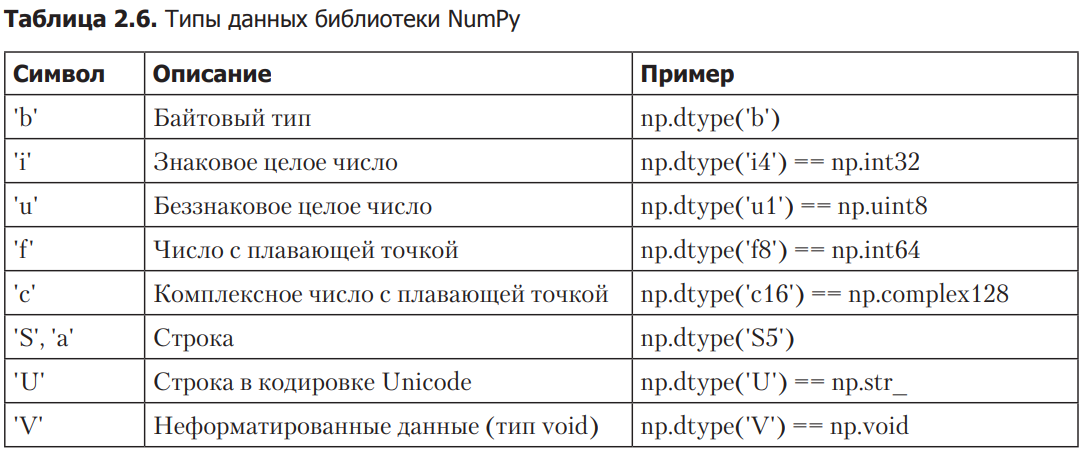

Можно создать тип, в котором каждый элемент содержит массив или матрицу значений.

In [110]:
tp = np.dtype([('id', 'i8'), ('mat', 'f8', (3, 3))])
x = np.zeros(1, dtype=tp)
x

array([(0, [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]])],
      dtype=[('id', '<i8'), ('mat', '<f8', (3, 3))])

In [111]:
x[0]

(0, [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]])

In [112]:
x['mat'][0]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

Библиотека NumPy предоставляет класс np.recarray, практически идентичный только что описанным структурированным массивам, но с одной дополнительной возможностью: доступ к полям можно осуществлять как к атрибутам, а не только как к ключам словаря.

In [113]:
data_rec = data.view(np.recarray)
data_rec.age

array([25, 45, 37, 19])

Это эквевалентно записи:

In [114]:
data['age']

array([25, 45, 37, 19])

Но подобное представление структурированных записей значительно замедляет работу с ними на большом объёме данных, взамен предлагая чуть более удобный синтаксис.

На этом основы NumPy окончены, далее в книге описана библиотека Pandas.